In [37]:
%matplotlib inline
import pandas as pd
from plotnine import *
import numpy as np

In [38]:
x = 2.0
y = 5.0
z = 3.0

sim_length = 24

def euler(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        cur = np.array(vals[-1][:])
        dt = deltas[i] - deltas[i - 1]
        cur += func(cur, deltas[i]) * dt
        vals.append(cur)
    return np.array(vals)

def lorenz(u, t):
    x, y, z = u
    xd = (10 * (y - x))
    yd = (x * (28 - z) - y)
    zd = (x * y  - (8.0/3.0) * z)
    return np.array([xd, yd, zd])

xs = np.linspace(0, sim_length, sim_length * 3010)
ys = euler(lorenz, [x, y, z], xs)

In [39]:
df = pd.DataFrame(ys, columns=["x", "y", "z"])
df["time"] = xs

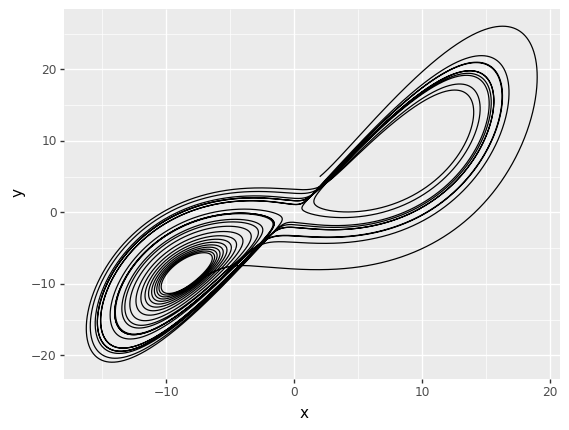

<ggplot: (8787298757690)>

In [40]:
ggplot(df, aes(x="x", y="y")) + geom_path()

In [41]:
dfmelt=pd.melt(df, id_vars=['time'], value_vars=["x", "y", "z"], 
               var_name='variables', value_name='values')
dfmelt

,time,variables,values
0,0.000000,x,2.000000
1,0.000332,x,2.009967
2,0.000664,x,2.019950
3,0.000997,x,2.029951
4,0.001329,x,2.039968
...,...,...,...
216715,23.998671,z,14.110911
216716,23.999003,z,14.126706
216717,23.999336,z,14.142622
216718,23.999668,z,14.158659


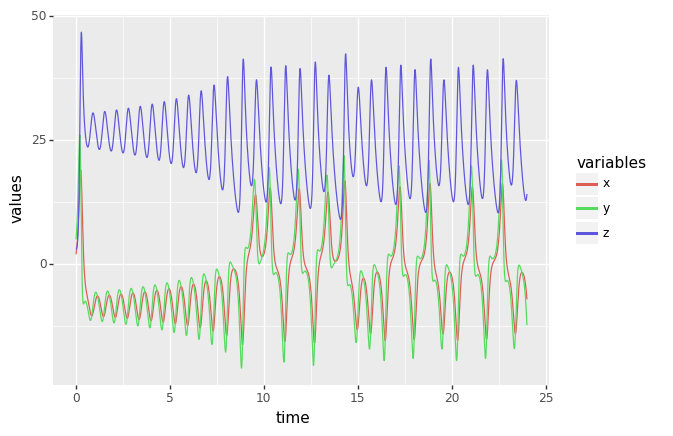

<ggplot: (8787298750202)>

In [42]:
ggplot(dfmelt, aes(x="time", y="values", color="variables")) + geom_line()

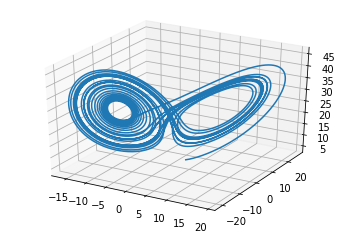

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plt.plot(df["x"], df["y"], df["z"])

In [44]:
def rk2(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        old = np.array(vals[-1][:])
        dt = deltas[i] - deltas[i - 1]
        d1 = func(old, deltas[i])
        cur = old + d1 * dt
        d2 = func(cur, deltas[i] + dt)
        better = old + ((d1 + d2) / 2) * dt
        vals.append(better)
    return np.array(vals)

In [45]:
ys = rk2(lorenz, [x, y, z], xs)

In [46]:
dfrk = pd.DataFrame(ys, columns=["rx", "ry", "rz"])
dfrk["time"] = xs

In [47]:
dfall = df.merge(dfrk, left_on="time", right_on="time")

In [48]:
dfrkmelt=pd.melt(dfall, id_vars=['time'], value_vars=["x", "rx"], 
                 var_name='variables', value_name='values')

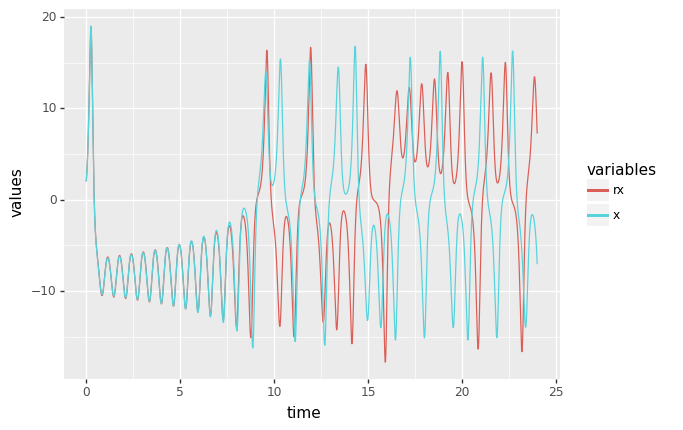

<ggplot: (8787321763621)>

In [49]:
ggplot(dfrkmelt, aes(x="time", y="values", color="variables")) + geom_line()

In [77]:
import math
from scipy.integrate import odeint

def growth(u, t):
    return u[0] * 0.1

def f(k, r, t):
    return k * math.e ** (r * t)

init = [4.0]
xs = np.linspace(0, 20, 3)

ys = euler(growth, init, xs)
yrs = rk2(growth, init, xs)
ybs = odeint(growth, init, xs)
yes = f(4, 0.1, xs)

In [78]:
xs

array([ 0., 10., 20.])

In [82]:
df = pd.DataFrame({"euler":ys[:, 0], 
                   "rk2":yrs[:, 0], 
                   "rk4":yr4s[:, 0], 
                   "odeint":ybs[:, 0], 
                   "closed":yes})
df["time"] = xs

In [83]:
dfmelt=pd.melt(df, id_vars=['time'], value_vars=["euler", "rk2", "rk4", "odeint", "closed"], 
                 var_name='variables', value_name='values')

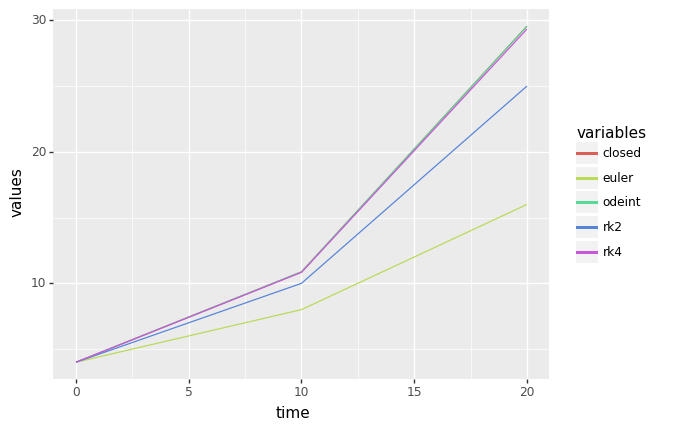

<ggplot: (8787321787272)>

In [84]:
ggplot(dfmelt, aes(x="time", y="values", color="variables")) + geom_line()

In [74]:
df

,euler,rk2,rk4,odeint,closed,time
0,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
1,6.666667,7.555556,7.786008,7.790936,7.790936,6.666667
2,11.111111,14.271605,15.155481,15.174672,15.174672,13.333333
3,18.518519,26.957476,29.500175,29.556225,29.556224,20.000000


In [55]:
dfmelt

,time,variables,values
0,0.000000,x,2.000000
1,0.000332,x,2.009967
2,0.000664,x,2.019950
3,0.000997,x,2.029951
4,0.001329,x,2.039968
...,...,...,...
216715,23.998671,z,14.110911
216716,23.999003,z,14.126706
216717,23.999336,z,14.142622
216718,23.999668,z,14.158659


In [59]:
def rk4(func, initial, deltas):
    ys = [initial]
    for i in range(1, len(xs)):
        old = np.array(ys[-1][:])
        dt = xs[i] - xs[i - 1]
        d1 = np.array(func(old, xs[i])) * dt
        d2 = np.array(func(old + 0.5 * d1, xs[i] + 0.5 * dt)) * dt
        d3 = np.array(func(old + 0.5 * d2, xs[i] + 0.5 * dt)) * dt
        d4 = np.array(func(old + d3, xs[i] + dt)) * dt
        better = old + ((d1 + 2 * d2 + 2 * d3 + d4) / 6.0)
        ys.append(better)
    return np.array(ys)

In [81]:
yr4s = rk4(growth, init, xs)